# RGBD images
Open3D has a data structure for images. It supports various functions such as read_image, write_image, filter_image and draw_geometries. An Open3D Image can be directly converted to/from a numpy array.

An Open3D RGBDImage is composed of two images, RGBDImage.depth and RGBDImage.color. We require the two images to be registered into the same camera frame and have the same resolution. The following tutorials show how to read and use RGBD images from a number of well known RGBD datasets.

In [1]:
import open3d as o3d 
import numpy as np 
import matplotlib.pyplot as plt 
import os
import sys
# only needed for tutorial, monkey patches visualization
sys.path.append (' ..')
import open3d_tutorial as o3dtut
# change to True if you want to interact with the visualization windows
o3dtut.interactive = not "CI" in os.environ

## Redwood dataset
In this section we show how to read and visualize an RGBDImage from the Redwood dataset [Choi2015].

The Redwood format stored depth in a 16-bit single channel image. The integer value represents the depth measurement in millimeters. It is the default format for Open3D to parse depth images.

In [2]:
print("Read Redwood dataset")
redwood_rgbd = o3d.data.SampleRedwoodRGBDImages()
color_raw = o3d.io.read_image(redwood_rgbd.color_paths[0])
depth_raw = o3d.io.read_image(redwood_rgbd.depth_paths[0])
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw)
print(rgbd_image)

Read Redwood dataset
[Open3D INFO] Downloading https://github.com/isl-org/open3d_downloads/releases/download/20220301-data/SampleRedwoodRGBDImages.zip
[Open3D INFO] Downloaded to /Users/sarahhaddad/open3d_data/download/SampleRedwoodRGBDImages/SampleRedwoodRGBDImages.zip
[Open3D INFO] Created directory /Users/sarahhaddad/open3d_data/extract/SampleRedwoodRGBDImages.
[Open3D INFO] Extracting /Users/sarahhaddad/open3d_data/download/SampleRedwoodRGBDImages/SampleRedwoodRGBDImages.zip.
[Open3D INFO] Extracted to /Users/sarahhaddad/open3d_data/extract/SampleRedwoodRGBDImages.
RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


The default conversion function create_rgbd_image_from_color_and_depth creates an RGBDImage from a pair of color and depth image. The color image is converted into a grayscale image, stored in float ranged in [0, 1]. The depth image is stored in float, representing the depth value in meters.

The converted images can be rendered as numpy arrays.

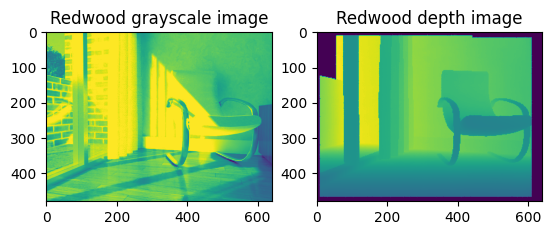

In [3]:
plt.subplot(1, 2, 1)
plt.title('Redwood grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('Redwood depth image')
plt.imshow(rgbd_image.depth)
plt.show()

The RGBD image can be converted into a point cloud, given a set of camera parameters.

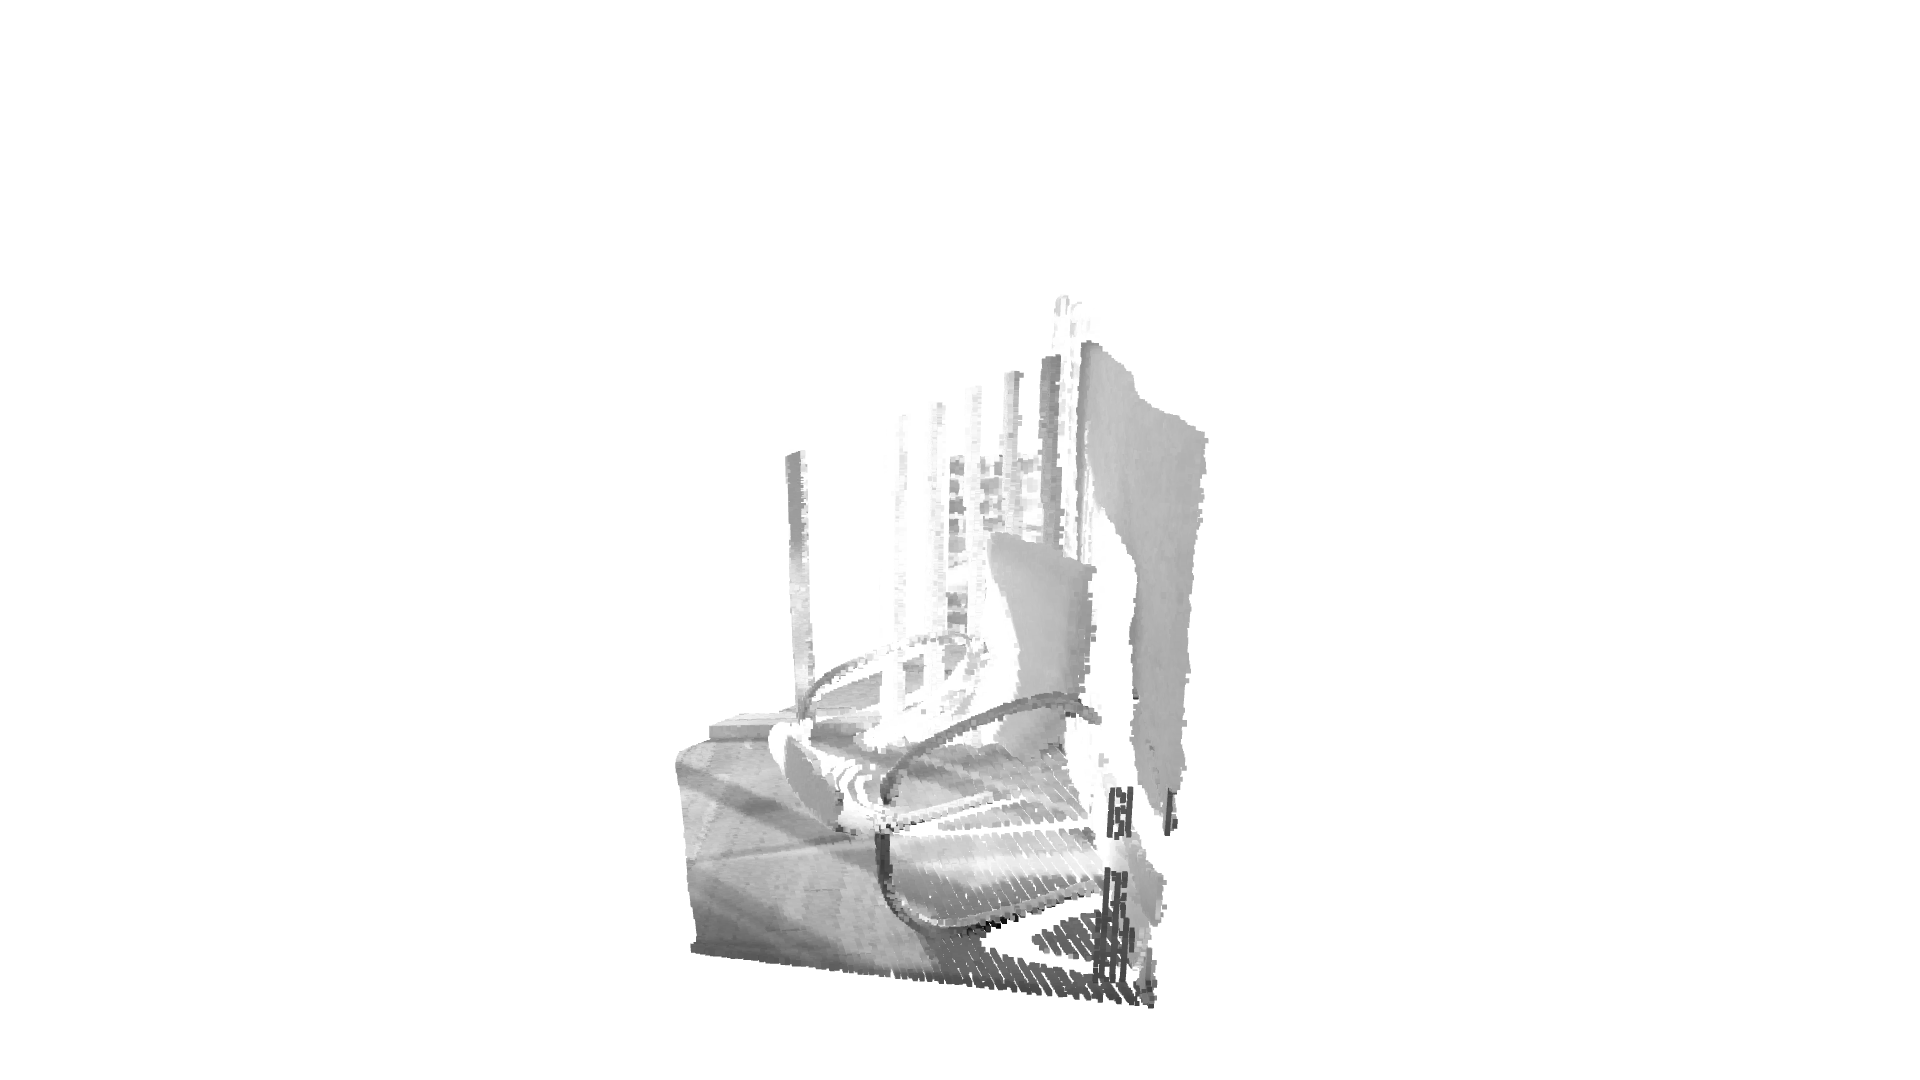

In [4]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])

Here we use PinholeCameraIntrinsicParameters.PrimeSenseDefault as default camera parameter. It has image resolution 640x480, focal length (fx, fy) = (525.0, 525.0), and optical center (cx, cy) = (319.5, 239.5). An identity matrix is used as the default extrinsic parameter. pcd.transform applies an up-down flip transformation on the point cloud for better visualization purpose.

## SUN dataset
In this section we show how to read and visualize an RGBDImage of the SUN dataset [Song2015].

This tutorial is almost the same as the tutorial processing Redwood dataset above. The only difference is that we use the conversion function create_rgbd_image_from_sun_format to parse depth images in the SUN dataset.

In [5]:
print("Read SUN dataset")
sun_rgbd = o3d.data.SampleSUNRGBDImage()
color_raw = o3d.io.read_image(sun_rgbd.color_path)
depth_raw = o3d.io.read_image(sun_rgbd.depth_path)
rgbd_image = o3d.geometry.RGBDImage.create_from_sun_format(color_raw, depth_raw)
print(rgbd_image)

Read SUN dataset
[Open3D INFO] Downloading https://github.com/isl-org/open3d_downloads/releases/download/20220201-data/SampleSUNRGBDImage.zip
[Open3D INFO] Downloaded to /Users/sarahhaddad/open3d_data/download/SampleSUNRGBDImage/SampleSUNRGBDImage.zip
[Open3D INFO] Created directory /Users/sarahhaddad/open3d_data/extract/SampleSUNRGBDImage.
[Open3D INFO] Extracting /Users/sarahhaddad/open3d_data/download/SampleSUNRGBDImage/SampleSUNRGBDImage.zip.
[Open3D INFO] Extracted to /Users/sarahhaddad/open3d_data/extract/SampleSUNRGBDImage.
RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


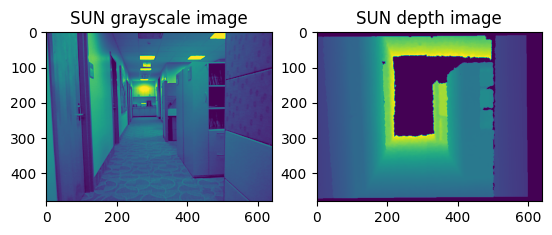

In [6]:
plt.subplot(1, 2, 1)
plt.title('SUN grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('SUN depth image')
plt.imshow(rgbd_image.depth)
plt.show()

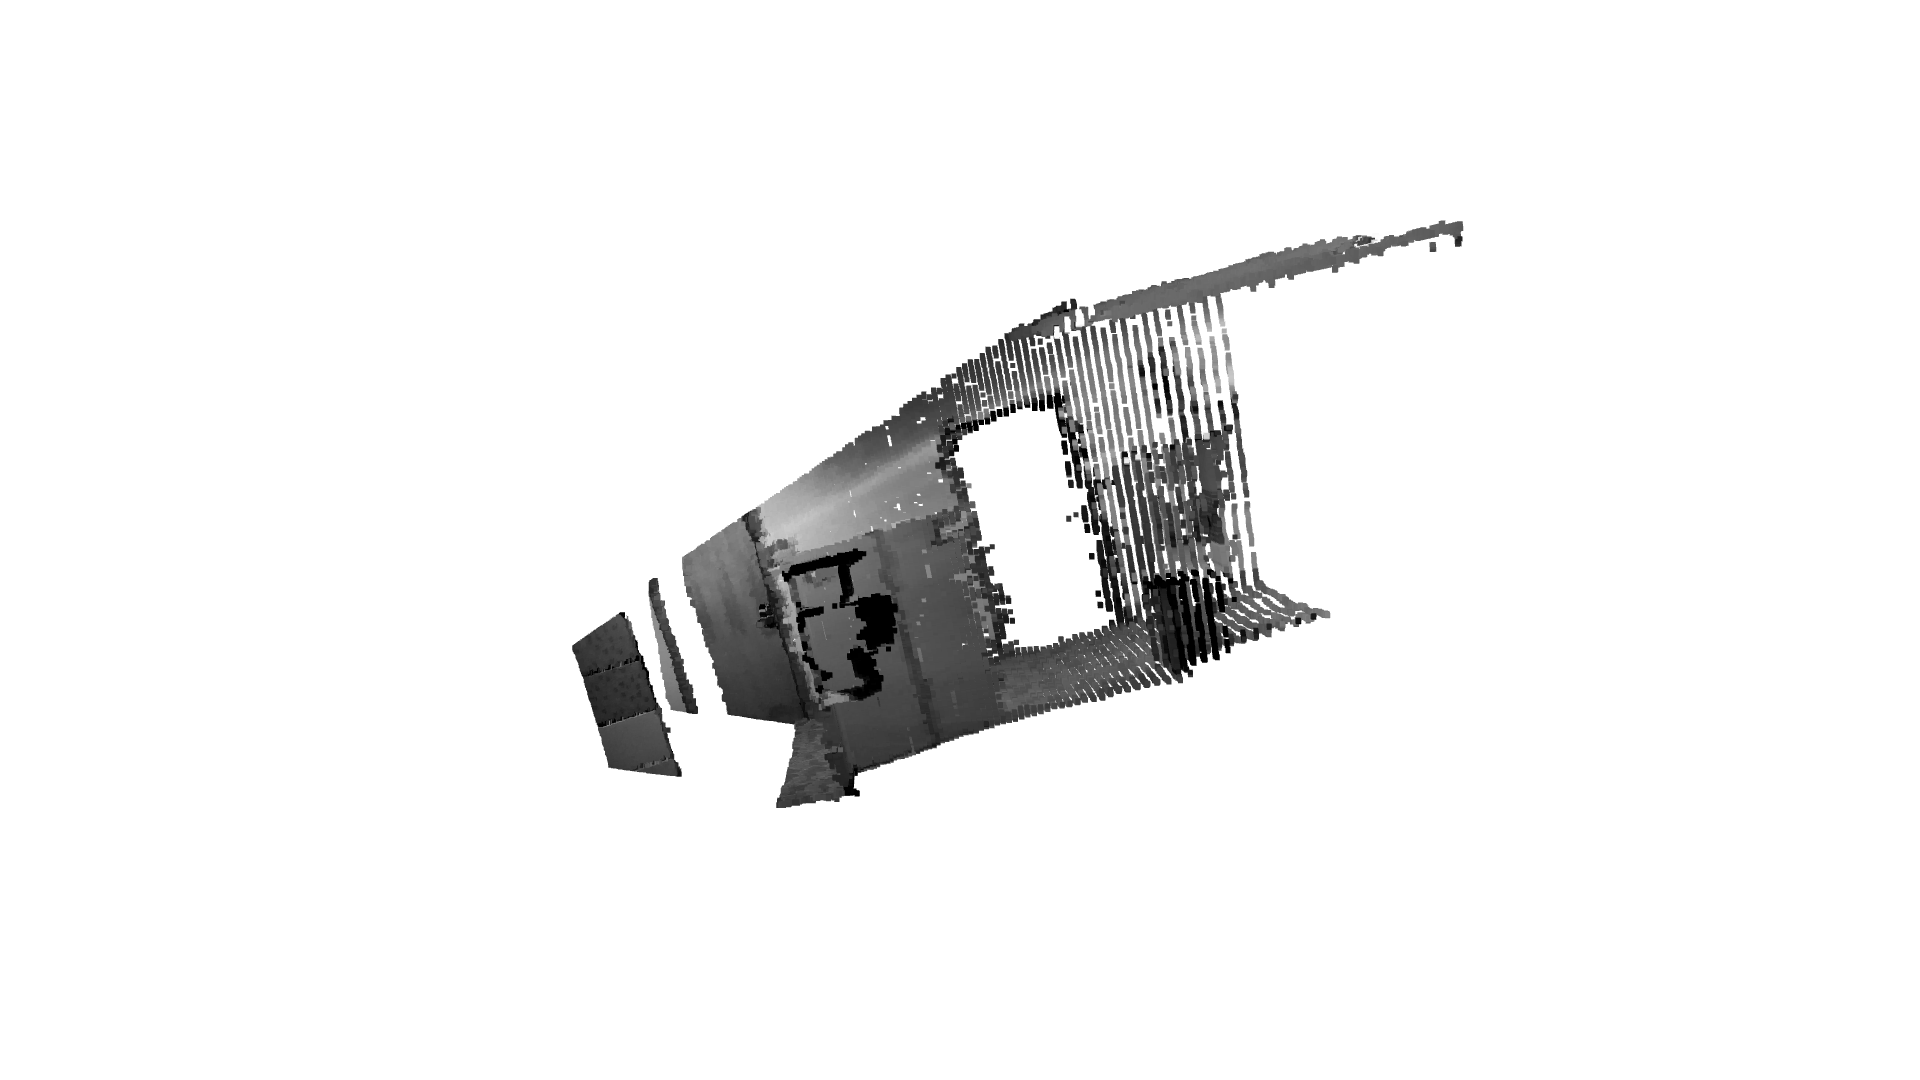

In [7]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])

## NYU dataset
This section shows how to read and visualize an RGBDImage from the NYU dataset [Silberman2012].

This tutorial is almost the same as the tutorial processing Redwood dataset above, with two differences. First, NYU images are not in standard jpg or png formats. Thus, we use mpimg.imread to read the color image as a numpy array and convert it to an Open3D Image. An additional helper function read_nyu_pgm is called to read depth images from the special big endian pgm format used in the NYU dataset. Second, we use a different conversion function create_rgbd_image_from_nyu_format to parse depth images in the SUN dataset.

In [8]:
import matplotlib.image as mpimg
import re


# This is special function used for reading NYU pgm format
# as it is written in big endian byte order.
def read_nyu_pgm(filename, byteorder='>'):
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    img = np.frombuffer(buffer,
                        dtype=byteorder + 'u2',
                        count=int(width) * int(height),
                        offset=len(header)).reshape((int(height), int(width)))
    img_out = img.astype('u2')
    return img_out


print("Read NYU dataset")
# Open3D does not support ppm/pgm file yet. Not using o3d.io.read_image here.
# MathplotImage having some ISSUE with NYU pgm file. Not using imread for pgm.
nyu_rgbd = o3d.data.SampleNYURGBDImage()
color_raw = mpimg.imread(nyu_rgbd.color_path)
depth_raw = read_nyu_pgm(nyu_rgbd.depth_path)
color = o3d.geometry.Image(color_raw)
depth = o3d.geometry.Image(depth_raw)
rgbd_image = o3d.geometry.RGBDImage.create_from_nyu_format(color, depth)
print(rgbd_image)

Read NYU dataset
[Open3D INFO] Downloading https://github.com/isl-org/open3d_downloads/releases/download/20220201-data/SampleNYURGBDImage.zip
[Open3D INFO] Downloaded to /Users/sarahhaddad/open3d_data/download/SampleNYURGBDImage/SampleNYURGBDImage.zip
[Open3D INFO] Created directory /Users/sarahhaddad/open3d_data/extract/SampleNYURGBDImage.
[Open3D INFO] Extracting /Users/sarahhaddad/open3d_data/download/SampleNYURGBDImage/SampleNYURGBDImage.zip.
[Open3D INFO] Extracted to /Users/sarahhaddad/open3d_data/extract/SampleNYURGBDImage.
RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


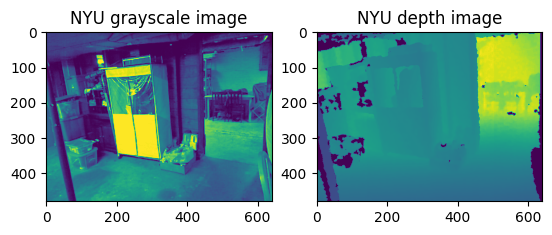

In [9]:
plt.subplot(1, 2, 1)
plt.title('NYU grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('NYU depth image')
plt.imshow(rgbd_image.depth)
plt.show()

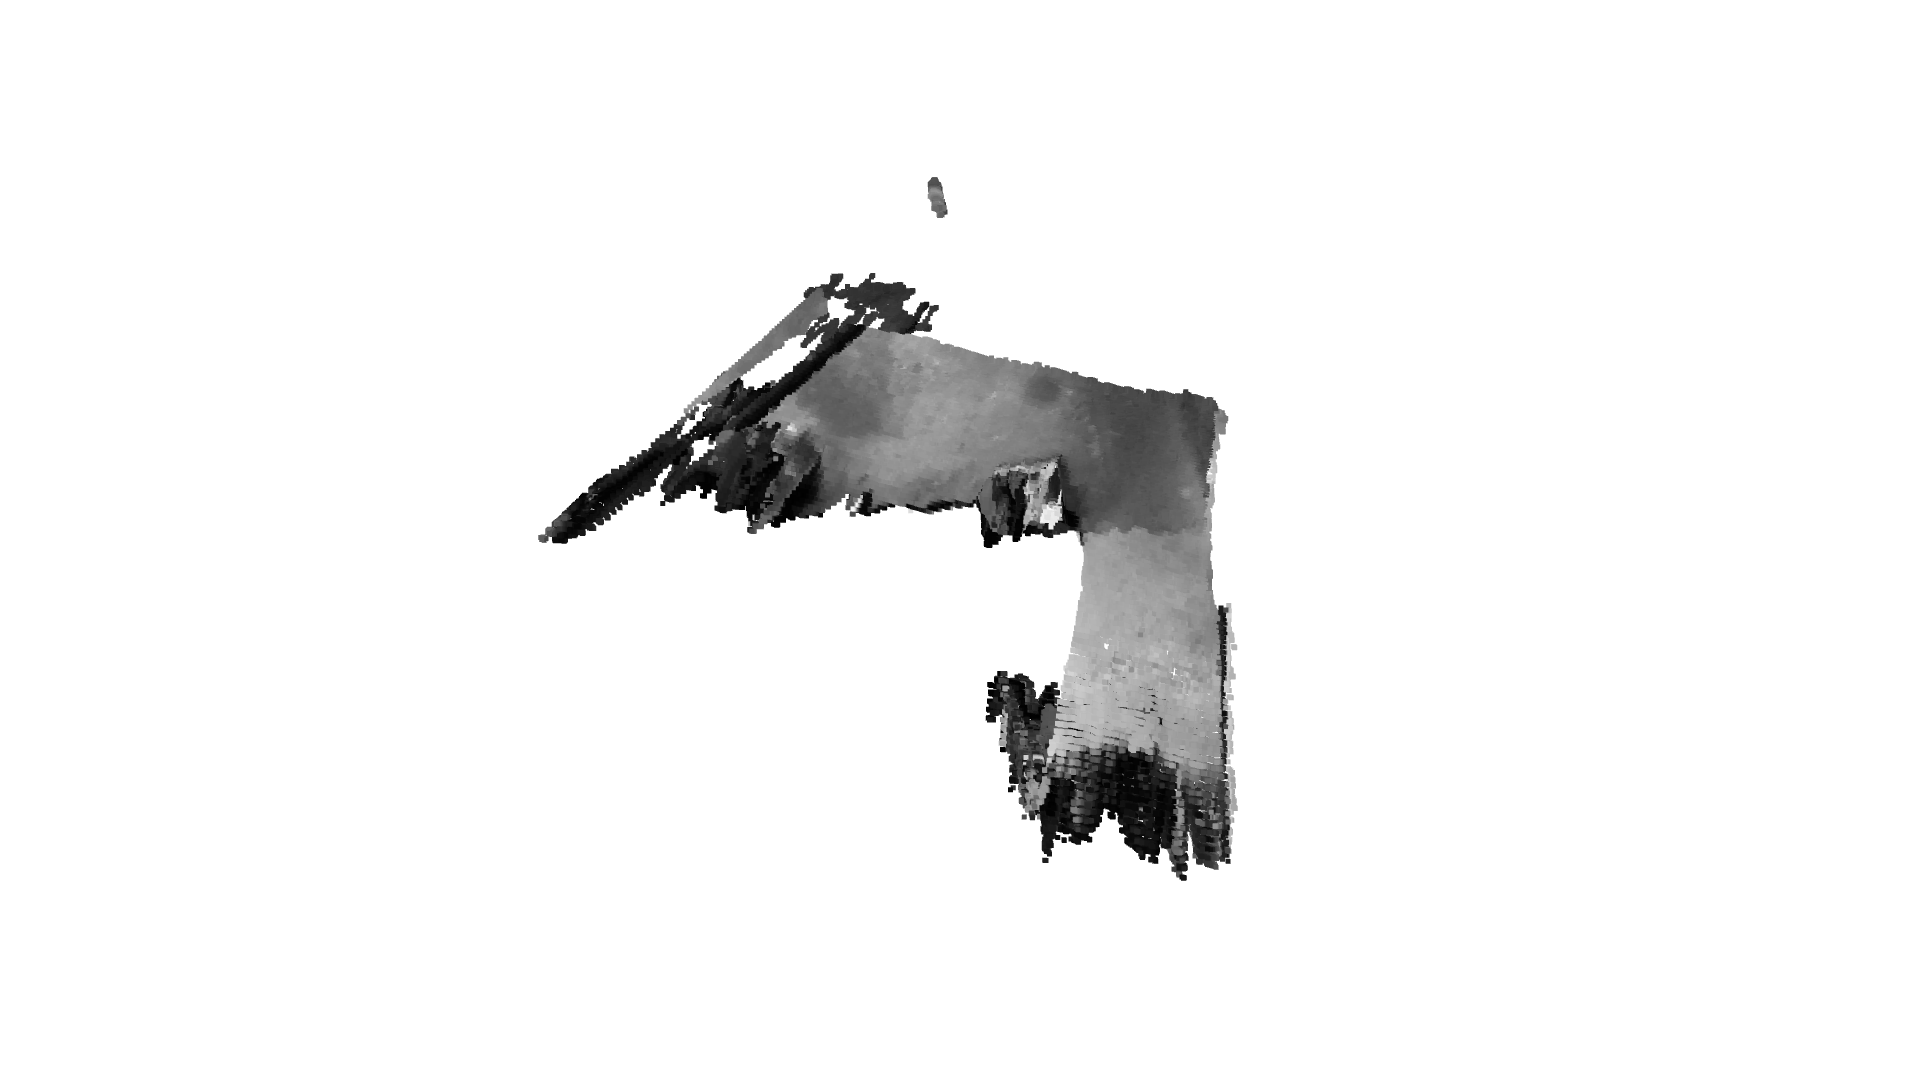

In [10]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])

## TUM dataset
This section shows how to read and visualize an RGBDImage from the TUM dataset [Strum2012].

This tutorial is almost the same as the tutorial processing Redwood dataset above. The only difference is that we use the conversion function create_rgbd_image_from_tum_format to parse depth images in the TUM dataset.

In [11]:
print("Read TUM dataset")
tum_rgbd = o3d.data.SampleSUNRGBDImage()
color_raw = o3d.io.read_image(tum_rgbd.color_path)
depth_raw = o3d.io.read_image(tum_rgbd.depth_path)
rgbd_image = o3d.geometry.RGBDImage.create_from_tum_format(color_raw, depth_raw)
print(rgbd_image)

Read TUM dataset
RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


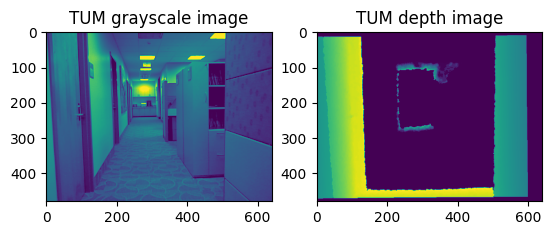

In [12]:
plt.subplot(1, 2, 1)
plt.title('TUM grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('TUM depth image')
plt.imshow(rgbd_image.depth)
plt.show()

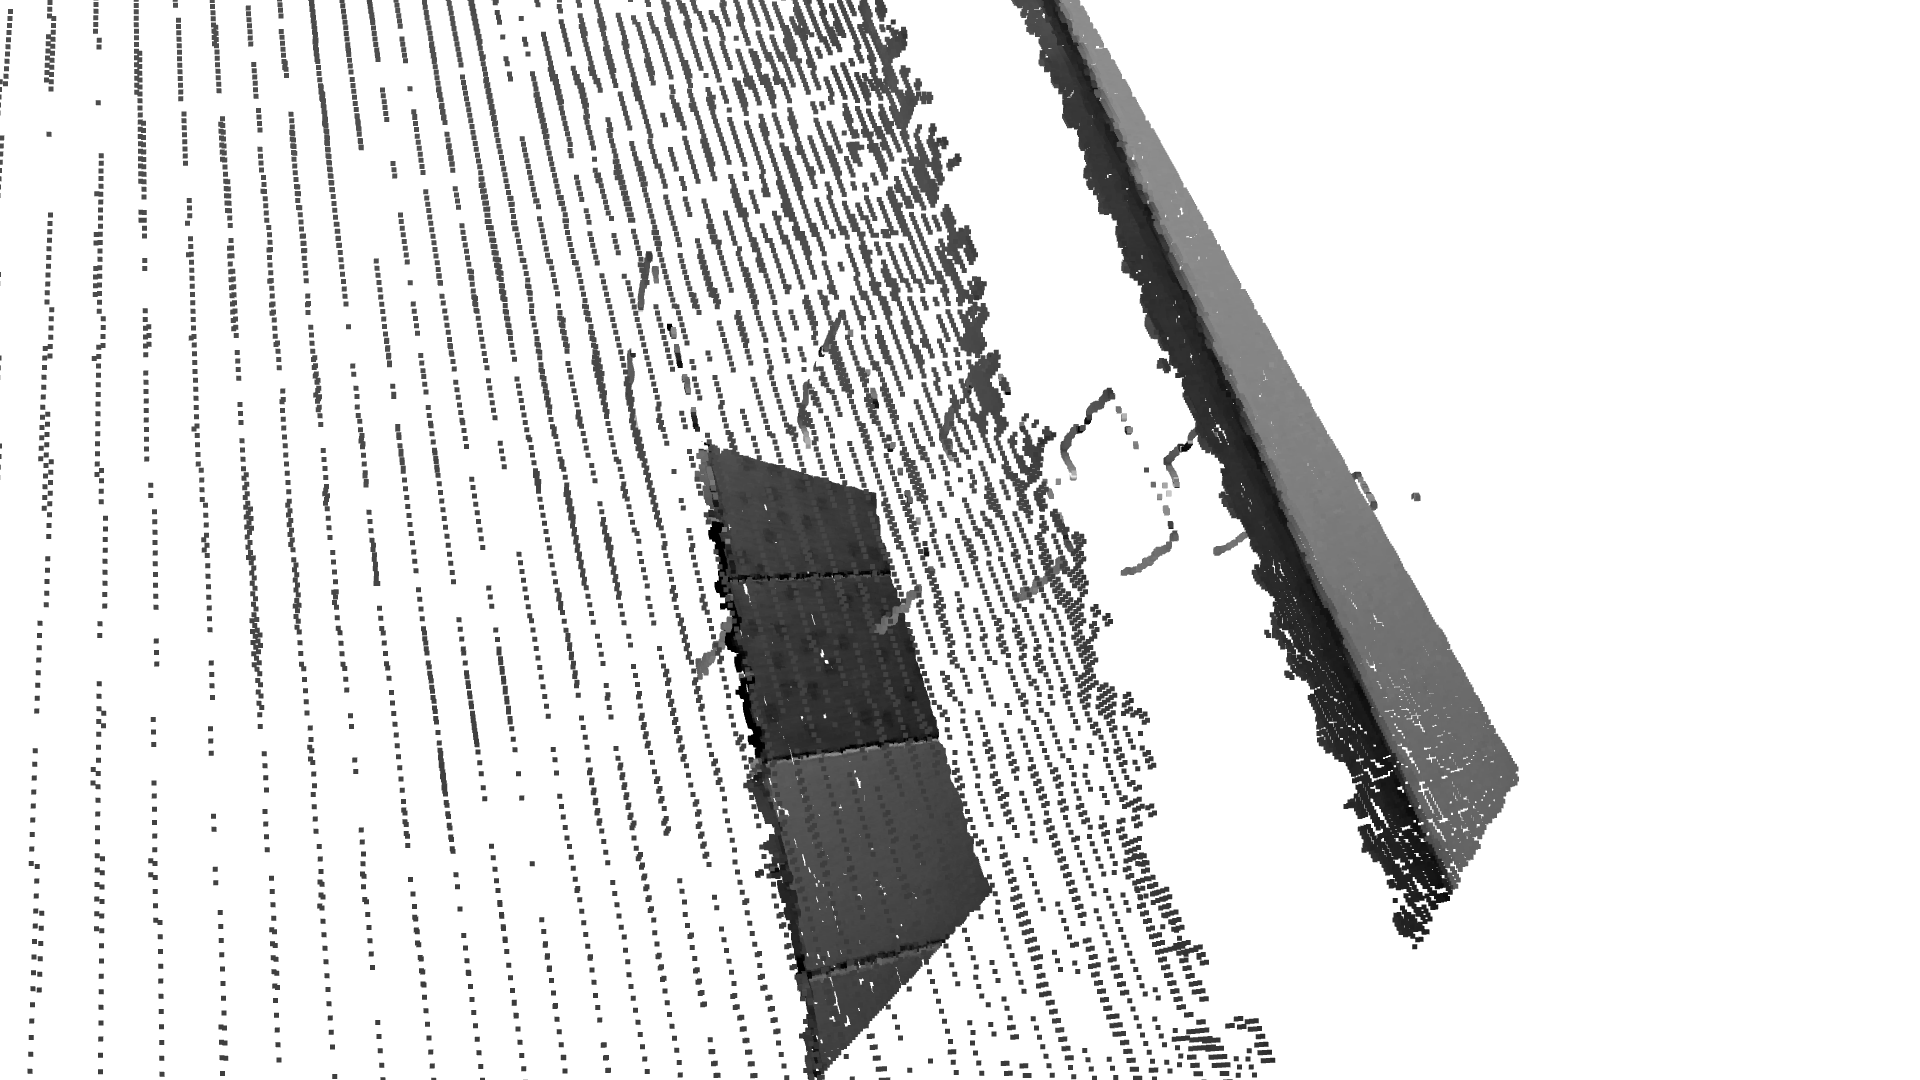

: 

In [13]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd], zoom=0.35)